<a href="https://colab.research.google.com/github/nanda1296/Sequence-Model-with-RNN/blob/main/FinalExam_DP_500197946.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AISC2007 - Deep Learning** \

Name: Nanda Kishore Karicherla \
Student ID: 500197946 \

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Sequence Model with RNN

1.   *List item*
2.   List item



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras

In [ ]:
df = pd.read_excel('/content/news-text-sanitized.xlsx')

In [ ]:
df.head(10)

,Category,Confidence,Tweet
0,Not Relevant,1.0,Hey! How are you?
1,Not Relevant,1.0,What's up man?
2,Not Relevant,1.0,I love fruits
3,Not Relevant,1.0,Summer is lovely
4,Not Relevant,1.0,My car is so fast
5,Not Relevant,1.0,What a nice hat?
6,Not Relevant,1.0,What a goooooooaaaaaal!!!!!!
7,Not Relevant,1.0,Fuck off!
8,Not Relevant,1.0,No I don't like cold!
9,Not Relevant,1.0,this is ridiculous....


In [ ]:
df.isnull()

,Category,Confidence,Tweet
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
10318,False,False,False
10319,False,False,False
10320,False,False,False
10321,False,False,False


In [ ]:
df.describe()

,Confidence
count,10323.000000
mean,0.840754
std,0.168453
min,0.334200
25%,0.711800
50%,0.804800
75%,1.000000
max,1.000000


<BarContainer object of 3 artists>

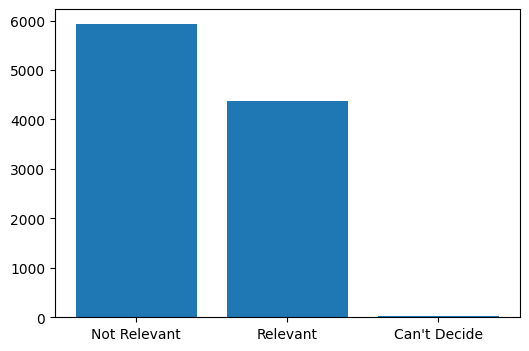

In [ ]:
#data distribution chart for various categories
distribution = df.Category.value_counts()
plt.figure(figsize=(6,4))
plt.bar(distribution.index, distribution.values)

# Data Preprocessing

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
#Splitting the data into train and test as 80% and 20% respectively
train_data, test_data = train_test_split(df, test_size=0.2,random_state=1)
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 8258
Test Data size 2065


In [ ]:
#Converting the tweet text into tokens using tokenizer function
max_len = 50
max_words = 5000
tokenizer = Tokenizer(num_words=max_words, lower=True)
tokenizer.fit_on_texts(train_data.Tweet)
word_index_train = tokenizer.word_index

In [ ]:
#Total words converted
vocab_size_train = len(tokenizer.word_index)
print(vocab_size_train)

24081


In [ ]:
#Padding the tokens to not lose the data
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data.Tweet),maxlen = 50)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data.Tweet),maxlen = 50)

In [ ]:
#Encoding the given categories
labels = ['Not Relevant', 'Relevant']
encoder = LabelEncoder()
encoder.fit(train_data.Category.to_list())
y_train = encoder.transform(train_data.Category.to_list())
y_test = encoder.transform(test_data.Category.to_list())

# Building a unidirectional LSTM model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, Dropout, GRU, LSTM, Bidirectional, SpatialDropout1D, SimpleRNN
from keras.losses import binary_crossentropy
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report

In [ ]:
#defining the parameters
max_words = 10000
maxlen = 50
embedding_dim = 32

In [ ]:
LSTMmodel = Sequential()
LSTMmodel.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len)) # Configuring the parameters
LSTMmodel.add(LSTM(256, dropout=0.3))

# Adding a dense output layer with sigmoid activation
LSTMmodel.add(Dense(1, activation='sigmoid', name='output'))

LSTMmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 32)            320000    
                                                                 
 lstm (LSTM)                 (None, 256)               295936    
                                                                 
 output (Dense)              (None, 1)                 257       
                                                                 
Total params: 616,193
Trainable params: 616,193
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
LSTMmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
LSTMmodel.fit(X_train, y_train, batch_size=256, epochs=2, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = LSTMmodel.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/2
33/33 [==============================] - 36s 891ms/step - loss: -5.8393 - accuracy: 0.5695 - val_loss: -10.2246 - val_accuracy: 0.5758
Epoch 2/2
65/65 [==============================] - 3s 46ms/step - loss: -14.0833 - accuracy: 0.5758
Test accuracy: 0.5757869482040405


In [ ]:
# Compile the model
LSTMmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
LSTMmodel.fit(X_train, y_train, batch_size=256, epochs=2, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = LSTMmodel.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/2


/usr/local/lib/python3.9/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


33/33 [==============================] - 28s 740ms/step - loss: 0.0000e+00 - accuracy: 0.5742 - val_loss: 0.0000e+00 - val_accuracy: 0.5758
Epoch 2/2
65/65 [==============================] - 4s 63ms/step - loss: 0.0000e+00 - accuracy: 0.5758
Test accuracy: 0.5757869482040405


# Building a bidirectional GRU model

---



In [ ]:
BiGRUmodel = Sequential()
BiGRUmodel.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))   # Configuring the parameters
BiGRUmodel.add(SpatialDropout1D(0.2)) # Using a spatial dropout before the activation function
BiGRUmodel.add(Bidirectional(GRU(128)))
BiGRUmodel.add(Dropout(0.2))

# Adding a dense output layer with sigmoid activation
BiGRUmodel.add(Dense(1, activation='sigmoid', name='output'))

BiGRUmodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 32)            320000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 50, 32)           0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 256)              124416    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 output (Dense)              (None, 1)                 257       
                                                                 
Total params: 444,673
Trainable params: 444,673
Non-tr

In [ ]:
# Compile the model
BiGRUmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
BiGRUmodel.fit(X_train, y_train, batch_size=256, epochs=2, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = BiGRUmodel.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/2
33/33 [==============================] - 19s 449ms/step - loss: -4.2277 - accuracy: 0.5572 - val_loss: -10.9951 - val_accuracy: 0.5758
Epoch 2/2
65/65 [==============================] - 1s 19ms/step - loss: -15.4832 - accuracy: 0.5758
Test accuracy: 0.5757869482040405


In [ ]:
# Compile the model
BiGRUmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
BiGRUmodel.fit(X_train, y_train, batch_size=256, epochs=2, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = BiGRUmodel.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/2
33/33 [==============================] - 21s 466ms/step - loss: 0.0000e+00 - accuracy: 0.5742 - val_loss: 0.0000e+00 - val_accuracy: 0.5758
Epoch 2/2
65/65 [==============================] - 1s 19ms/step - loss: 0.0000e+00 - accuracy: 0.5758
Test accuracy: 0.5757869482040405


# Building a Deep RNN model


In [ ]:
RNNmodel = Sequential()

#input_layer
RNNmodel.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))  # Configuring the parameters
RNNmodel.add(SimpleRNN(128, dropout=0.2))
# Adding a dense layer with ReLU activation
RNNmodel.add(Dense(64, activation = 'relu'))
RNNmodel.add(Dense(32, activation = 'relu'))

# Adding a dense output layer with sigmoid activation
RNNmodel.add(Dense(1, activation = 'sigmoid', name='output'))
RNNmodel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 32)            320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               20608     
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 output (Dense)              (None, 1)                 33        
                                                                 
Total params: 350,977
Trainable params: 350,977
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
RNNmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
RNNmodel.fit(X_train, y_train, batch_size=256, epochs=2, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = RNNmodel.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/2
33/33 [==============================] - 5s 100ms/step - loss: -4.6739 - accuracy: 0.5681 - val_loss: -14.2033 - val_accuracy: 0.5758
Epoch 2/2
65/65 [==============================] - 1s 8ms/step - loss: -67.2105 - accuracy: 0.5758
Test accuracy: 0.5757869482040405


In [ ]:
# Compile the model
RNNmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
RNNmodel.fit(X_train, y_train, batch_size=256, epochs=2, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = RNNmodel.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/2
33/33 [==============================] - 6s 105ms/step - loss: 0.0000e+00 - accuracy: 0.5742 - val_loss: 0.0000e+00 - val_accuracy: 0.5758
Epoch 2/2
65/65 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 0.5758
Test accuracy: 0.5757869482040405


In [ ]:
%%shell
jupyter nbconvert --to html /content/FinalExam_DP_500197946.ipynb